Invaid death valley tmax data 


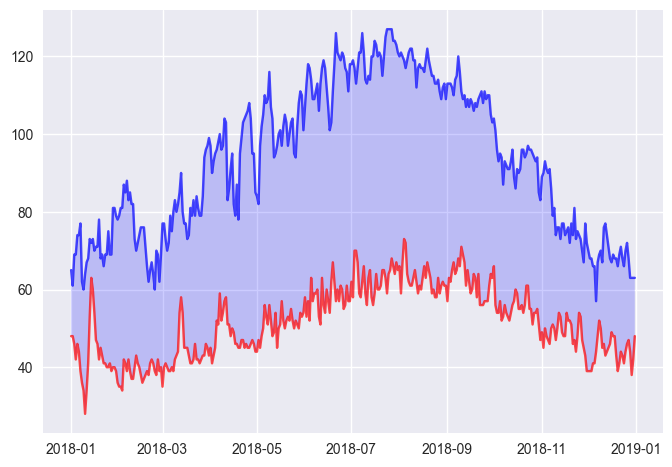

In [34]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

sitka_file = "data/sitka_weather_2018_simple.csv"
death_valley_file = "data/death_valley_2018_simple.csv"

sitka_data = {}
death_valley_data = {}

with open(sitka_file) as f: 
    reader = csv.reader(f)
    header_row = next(reader)

    for row in reader:
        date = datetime.strptime(row[2], "%Y-%m-%d")
        try:
            tmax = int(row[5])
            sitka_data[date] = tmax # assign the tmax value for the corresponding date as the key
        except ValueError:
            print("Invaid sitka tmax data")

with open(death_valley_file) as f: 
    reader = csv.reader(f)
    header_row = next(reader)

    for row in reader:
        date = datetime.strptime(row[2], "%Y-%m-%d")
        try:
            tmax = int(row[4])
            death_valley_data[date] = tmax
        except ValueError:
            print("Invaid death valley tmax data", row[4])

# get the common dates from both data
common_dates = sorted(set(sitka_data.keys()) & set(death_valley_data.keys()))

# build the List of two places tmax values for plotting where their date is the same
sitka_tmax = [sitka_data[date] for date in common_dates]
death_valley_tmax = [death_valley_data[date] for date in common_dates]

# get the min and max tmax value for creating a range 
all_tmax = sitka_tmax + death_valley_tmax
min_tmax = min(all_tmax)
max_tmax = max(all_tmax)

# plot the data
plt.style.use("seaborn")
fig, ax = plt.subplots()

ax.plot(common_dates, sitka_tmax, c="red", alpha=0.7)
ax.plot(common_dates, death_valley_tmax, c="blue", alpha=0.7)
plt.fill_between(common_dates, sitka_tmax, death_valley_tmax, facecolor="blue", alpha=0.2)

ax.set_ylim(min_tmax - 5, max_tmax + 5)

plt.show()


        